# Задание по визуализации

Ссылка на данные: https://drive.google.com/drive/folders/1by7kkSwB-uMgIKKwEU-U_i81MnxMR4oM?usp=sharing

## Вариант 1

**Задания:**
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `Vmag` и `e_Plx`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `TargetClass`.
5. Построить матрицу корреляции для всех переменных.
6. Построить графики парных зависимостей между всеми числовыми переменными (если много переменных, возьмите только часть).
7. Построить график распределения любой переменной.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

**Датасет для задания называется train_var1.csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train_var_1.csv")

In [ ]:
# ваше решение

**Задание 1**

In [ ]:
x = df["Vmag"]
y = df["e_Plx"]
x.shape, y.shape


((31641,), (31641,))

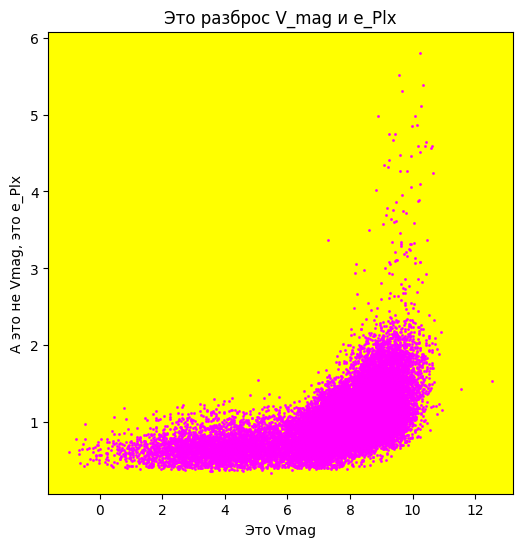

In [ ]:
x = df["Vmag"]
y = df["e_Plx"]
fig, ax = plt.subplots()

ax.scatter(x, y, c = '#FF00FF', s = 1)

ax.set_xlabel("Это Vmag")
ax.set_ylabel("А это не Vmag, это e_Plx")
ax.set_title("Это разброс V_mag и e_Plx")
ax.set_facecolor('yellow')     #  цвет области Axes

fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

Можно заметить, что с ростом Vmag все сильнее проявляется положительная корреляция

**Задание 2**

In [ ]:
df.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
TargetClass,0


<Figure size 500x500 with 0 Axes>

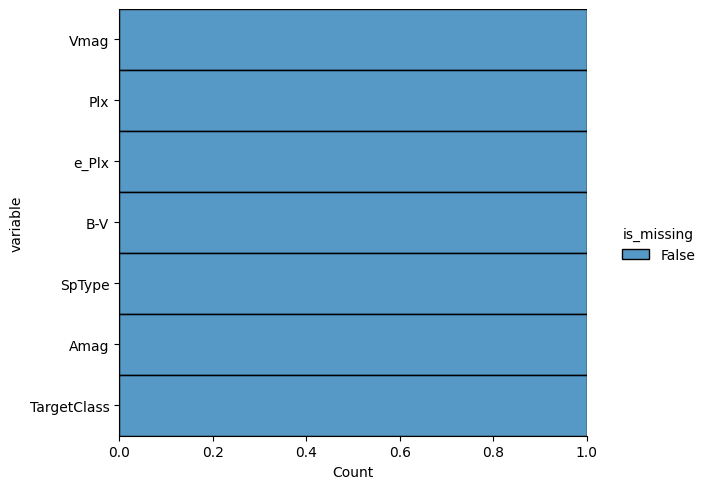

In [ ]:
plt.figure(figsize=(5,5))
sns.displot(
    data=df.isna().melt(value_name="is_missing"),
    y="variable",
    hue="is_missing",
    multiple = "fill",
    aspect=1.25)

Пропусков в датасете нет

Задание 3

In [ ]:
df.select_dtypes(include=['number'])

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,6.901420,24.569658,0.862829,0.737416,20.449126,1
1,4.334196,2.198947,0.593309,1.153210,13.043324,0
2,7.873019,11.750465,0.616568,0.589166,17.736492,1
3,8.110014,2.143815,0.848508,1.322107,15.592469,0
4,8.025193,4.165622,0.899296,1.141646,16.379680,0
...,...,...,...,...,...,...
31636,7.561113,0.692340,0.843319,0.252874,12.542120,0
31637,8.078011,3.002784,0.689891,0.971966,15.379710,0
31638,7.065964,7.820498,0.885794,0.435381,16.737442,1
31639,8.685452,2.643033,1.064647,0.988600,14.859882,0


<Axes: ylabel='TargetClass'>

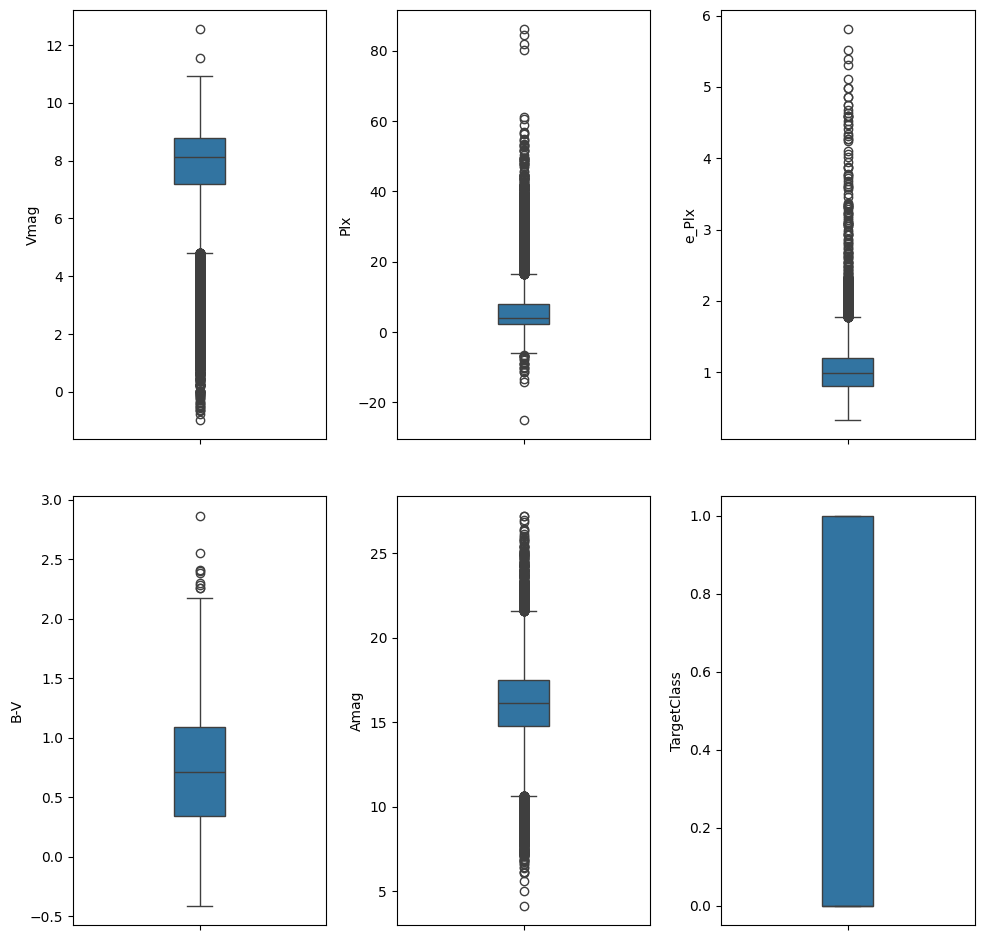

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10,10))
fig.tight_layout(pad = 2)
n = 0.2

# ax[0].scatter()
sns.boxplot(df['Vmag'], ax=axes[0, 0], width=n)
sns.boxplot(df['Plx'], ax=axes[0, 1], width=n)
sns.boxplot(df['e_Plx'], ax=axes[0, 2], width=n)
sns.boxplot(df['B-V'], ax=axes[1, 0], width=n)
sns.boxplot(df['Amag'], ax=axes[1, 1], width=n)
sns.boxplot(df['TargetClass'], ax=axes[1, 2], width=n)

Аномалий нет в столбце TargetClass, так как значения в нем принимают либо 1 либо 0. Также не так много аномлий, но они есть в B-V. Остальные же параметры включают огромное значение аномалий, особенно Plx и e_Plx

Задание 4

<Axes: title={'center': 'TargetClass'}, xlabel='Значение', ylabel='Количество'>

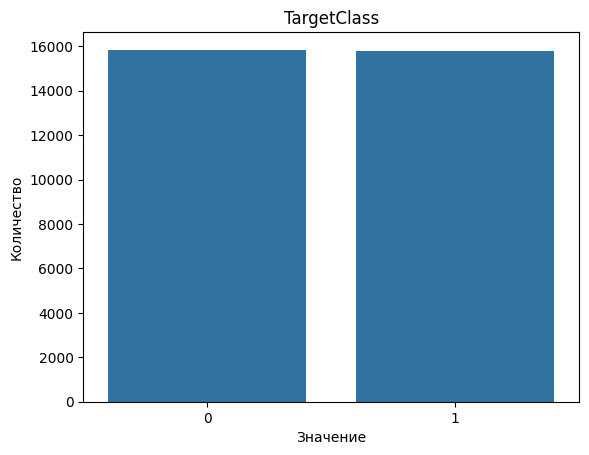

In [ ]:
plt.title('TargetClass')
plt.xlabel('Значение')
plt.ylabel('Количество')
sns.countplot(x='TargetClass', data=df)

TargetClass принимает значения 1 и 0 примерно поровну

Задание 5

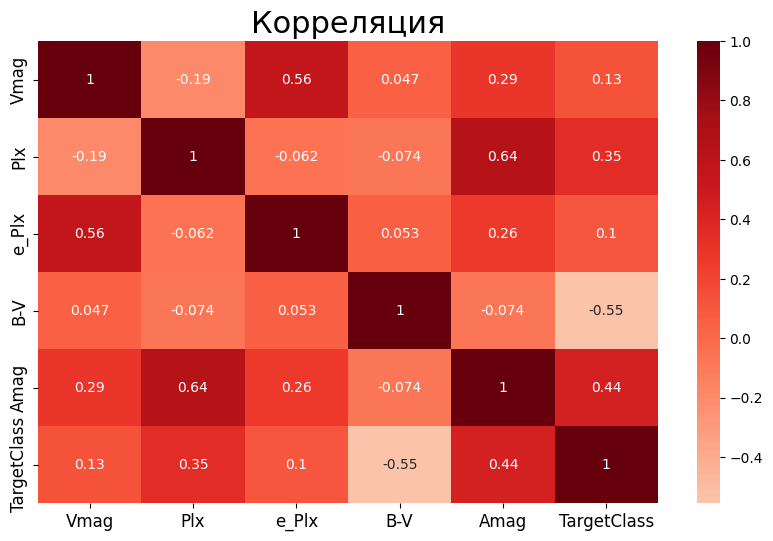

In [ ]:
plt.figure(figsize=(10,6))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='Reds', center=0, annot=True)
# color pallete sns
# Decorations
plt.title('Корреляция', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

В большинстве случаев наблюдается околонулевая корреляция, однако между параметрами Amag и Plx, Vmag и e_Plx, Amag и TargetClass видна положительная корреляция приближенная к 0.5 у Amag и Plx- 0.64. Также параметры B-V и TargetClass имеют отрицательную корреляцию в -0.55

Задача 6

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

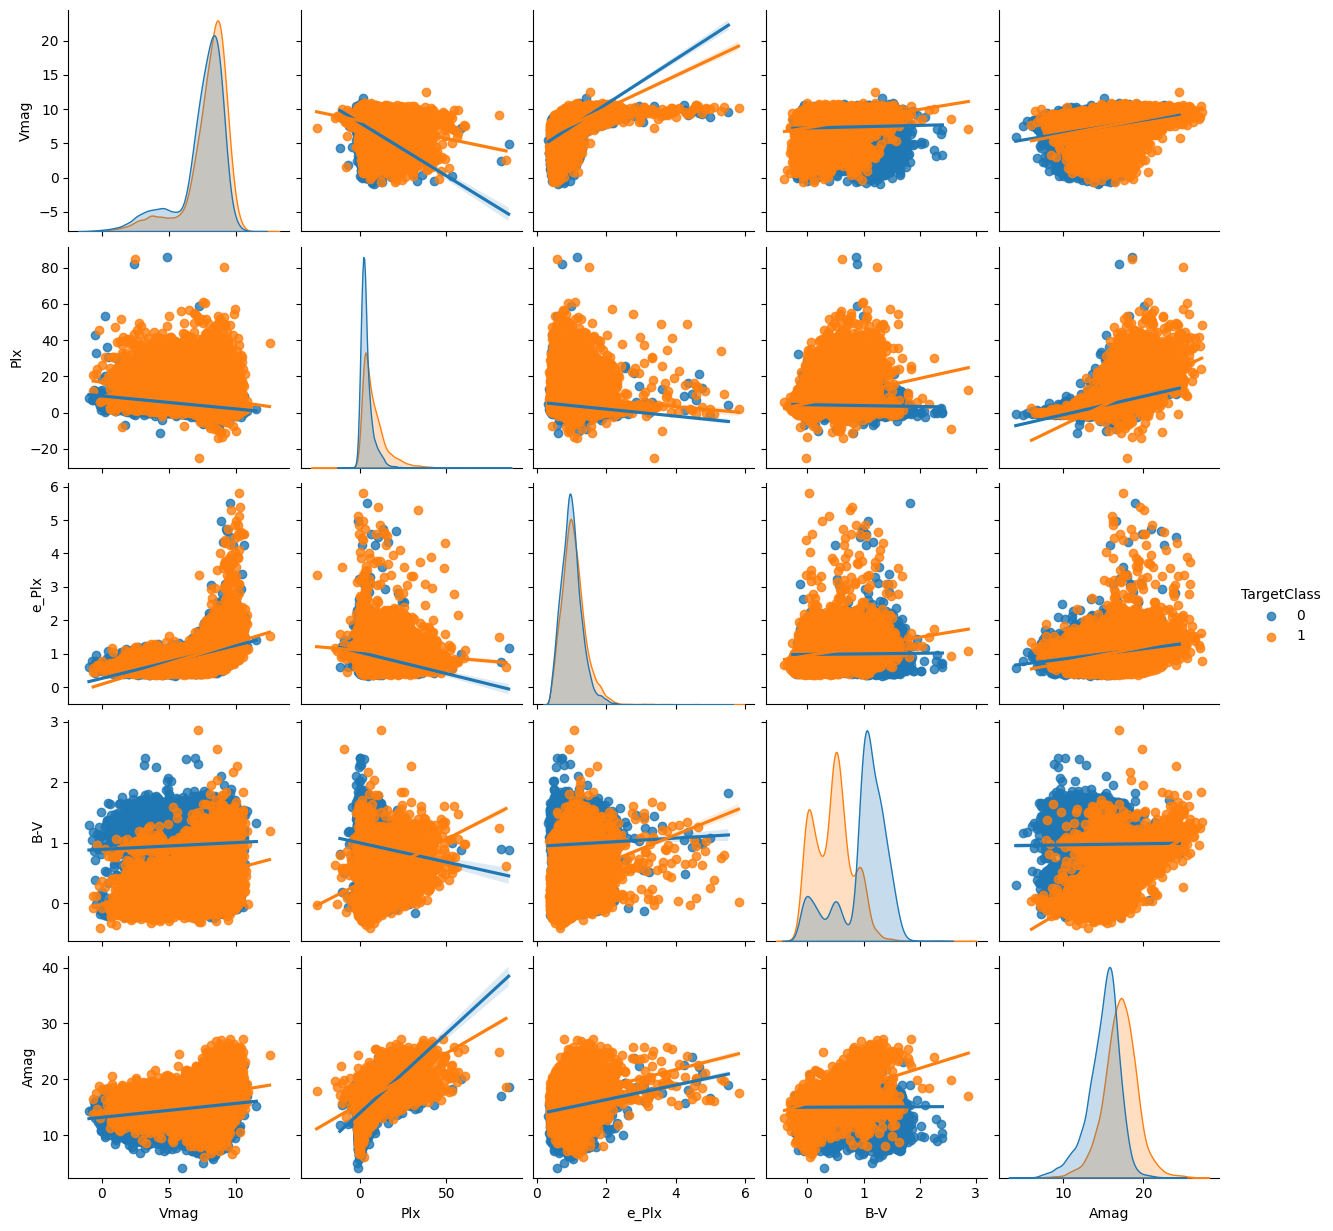

In [ ]:
plt.figure(figsize=(10, 10))
ddf = df.select_dtypes(include='number')
sns.pairplot(ddf, kind='reg', hue = 'TargetClass')
plt.show

Результаты схожи с матрицей корреляции

Задание 7

<ipython-input-25-b10dca254c7c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Vmag'], bins=20)


<Axes: title={'center': 'Vmag'}, xlabel='Vmag', ylabel='Density'>

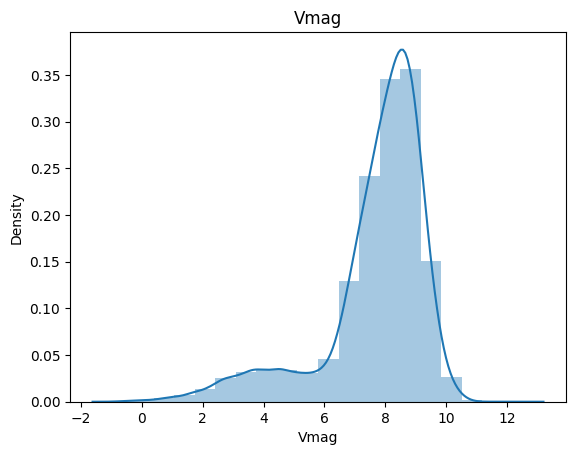

In [ ]:
plt.title('Vmag')
sns.distplot(df['Vmag'], bins=20)

Биноминальное распределение